**EDA USING PYTHON**

Analysing dataset to discover patterns, trends and relationships withing the data.

Guides us in making informed decisions and formulate strategies to solve real buisness problems.

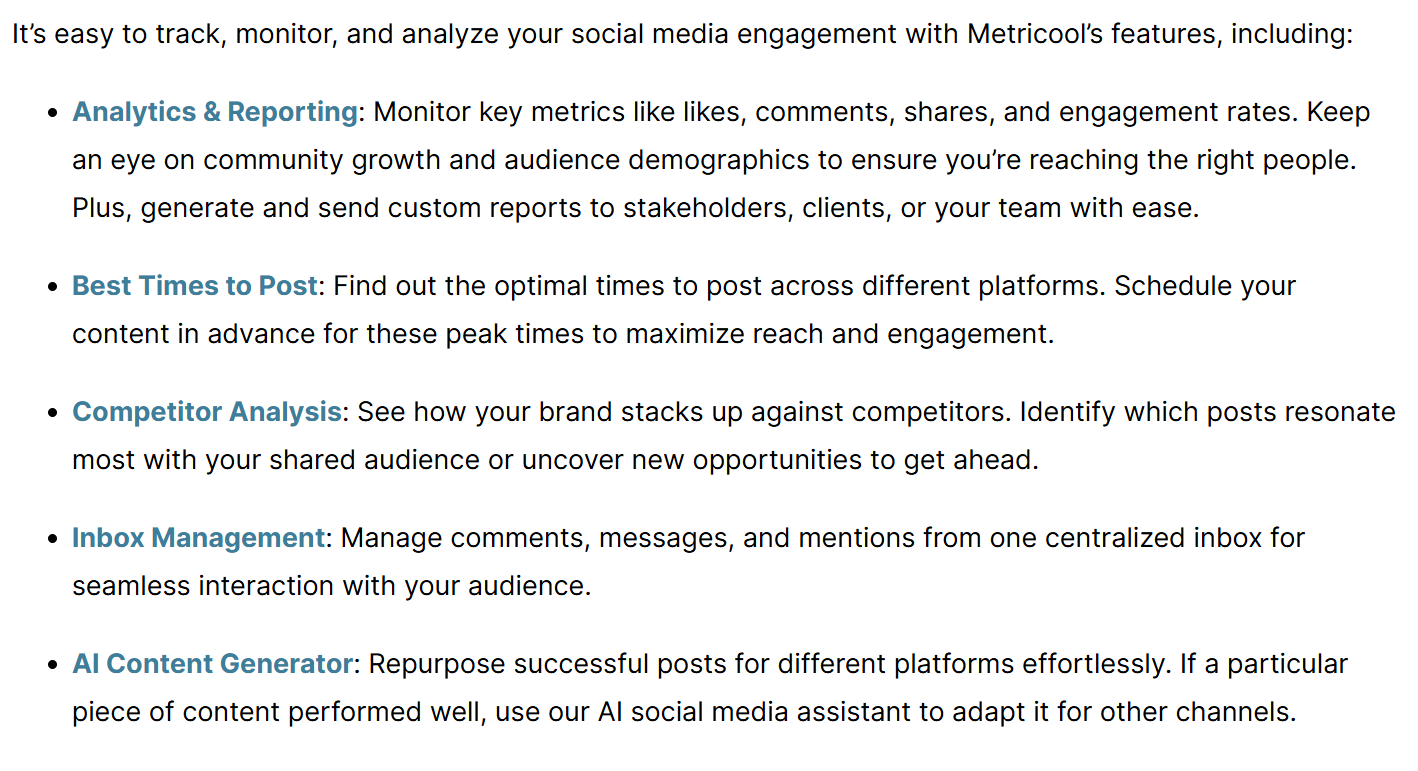

In [24]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio #figure to string of bytes
pio.templates.default = "plotly_white"
'''
plotly is a python open source librabry for data visualization
'''

data = pd.read_csv('Instagram data.csv',encoding = 'latin-1') # latin-1 can encode values from 0to 255; supports english and that that does not have complex char
# there is direct mapping to unicode char
# use when dealing witg legacy data
# other types: utf-8, ascii

#print(data.head())
print(data.columns)
print()
print(data.info())
print()
print(data.describe())
print()
print(data.isnull().sum())


Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), obje

In [25]:
fig = px.histogram(data, x='Impressions', nbins = 10, title= 'Distribution of Impresions')
fig.show()

In [26]:
# number of impressions on each post over time

fig = px.line(data, x=data.index,
              y = 'Impressions',
              title= 'Impressions over time')
fig.show()

In [27]:
# likes saves and follows from each post over time

'''
fig = px.line(data, x = data.index,
              y = ['Likes', 'Comments', 'Shares'],
              title = 'Engagement metrics over time')
fig.show()
'''

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Likes'], name= 'Likes'))
fig.add_trace(go.Scatter(x=data.index, y=data['Saves'], name='Saves'))
fig.add_trace(go.Scatter(x=data.index, y=data['Follows'], name='Follows'))

fig.update_layout(title='Metrics Over Time',
                  xaxis_title='index',
                  yaxis_title='Count')

fig.show()

'''
the 3 lines are traces, i.e. single data series
syntax = fig.add_trace(trace_object)
where trace_object is a trace types such as go.Scatter, go.Bar, go.Histogram etc
'''


'\nthe 3 lines are traces, i.e. single data series \nsyntax = fig.add_trace(trace_object)\nwhere trace_object is a trace types such as go.Scatter, go.Bar, go.Histogram etc\n'

In [28]:
# distribution of reach from different sourvces

reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=reach_sources,
             values=reach_counts,
             title='Reach from Different Sources',
             color_discrete_sequence=colors)
fig.show()

In [29]:
# distribution of engagement sources

engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

fig = px.pie(data_frame=data, names=engagement_metrics,
             values=engagement_counts,
             title='Engagement Sources',
             color_discrete_sequence=colors)
fig.show()

In [37]:
#relation between no. of profile visits and follows

fig = px.scatter(data,
                 x='Profile Visits',
                 y='Follows',
                 trendline = 'ols', # 'Ordinary LEast Squares'
                 title='Profile Visits vs. Follows')
fig.show()

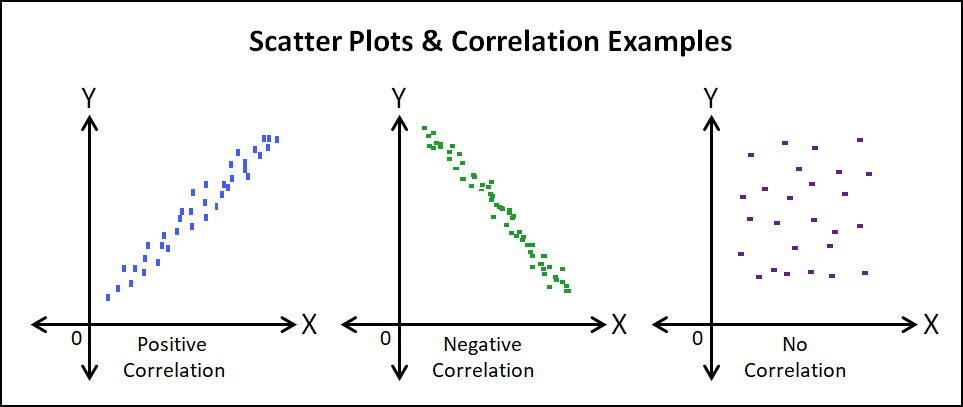

In [31]:
# type of hashtags used in the posts using a wordcloud

from wordcloud import WordCloud

hashtags = ' '.join(data['Hashtags'].astype(str))
wordcloud = WordCloud().generate(hashtags)

fig = px.imshow(wordcloud, title='Hashtags Word Cloud')
fig.show()

In [32]:
# correlation between features

corr_matrix = data.select_dtypes(include=['number']).corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                               x=corr_matrix.columns,
                               y=corr_matrix.index,
                               colorscale='RdBu',
                               zmin=-1,
                               zmax=1))

fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')

fig.show()

'''
Red for negative correlations.
Blue for positive correlations.
White for correlations near 0 (neutral).
'''

'\nRed for negative correlations.\nBlue for positive correlations.\nWhite for correlations near 0 (neutral).\n'

In [33]:
# distibution of hashtags
all_hashtag = []
for i in data.Hashtags:
  hash = str(i).split()
  hash = [tag.strip() for tag in hash]
  all_hashtag.extend(hash) # extend adds multi items from the iterable

hash_dist = pd.Series(all_hashtag).value_counts().reset_index()
'''
.value_counts():
Counts the occurrences of each unique hashtag in the Series

.reset_index():
Converts the Series into a DataFrame
'''

hash_dist.columns = ['Hashtag', 'Count']

fig = px.bar(hash_dist, x='Hashtag',
             y='Count', title='Distribution of Hashtags')
fig.show()

In [34]:
# distribution of likes and impressions received from the presence of each hashtag on the post
hashtag_likes = {}
hashtag_impressions = {}

for index, row in data.iterrows(): #iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFram
  hashtags = str(row['Hashtags']).split()
  for hashtag in hashtags:
      hashtag = hashtag.strip()
      if hashtag not in hashtag_likes:
        hashtag_likes[hashtag] = 0
        hashtag_impressions[hashtag] = 0
      hashtag_likes[hashtag] += row['Likes']
      hashtag_impressions[hashtag] += row['Impressions']

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

fig_likes = px.bar(likes_distribution, x='Hashtag', y='Likes',
                   title='Likes Distribution for Each Hashtag')

fig_impressions = px.bar(impressions_distribution, x='Hashtag',
                         y='Impressions',
                         title='Impressions Distribution for Each Hashtag')

fig_likes.show()
fig_impressions.show()


**Reach Forecasting**

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

data = pd.read_csv('Instagram-Reach.csv')
print(data.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


In [9]:
# analysing the treand of insta reach over time using line chart

fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'],
                      y = data['Instagram reach']))
fig.update_layout(title= "Trend of reach over time",
                  xaxis_title = "Date",
                  yaxis_title = 'Reach')
fig.show()


In [10]:
# analysing reach for each day using bar

fig = go.Figure()
fig.add_trace(go.Bar(x = data['Date'],
                     y = data['Instagram reach']))
fig.update_layout(title = 'reach for each day',
                  xaxis_title = 'day',
                  yaxis_title = 'reach')

fig.show()

In [16]:
# creatign a day coln and analysing reach based on the days of the week
data['Day'] = data['Date'].dt.day_name()

import numpy as np
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean','median','std']).reset_index()
print(day_stats)


         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['mean'],
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['median'],
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'],
                     y=day_stats['std'],
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week',
                  xaxis_title='Day',
                  yaxis_title='Instagram Reach')
fig.show()